# Even more bandit, the world getting more dangerous by day

This notebook will explore 2 new bandit algorithm: Explore then Commit and Thompson bandit

In [1]:
import time
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid')

In [2]:
n_testbed = 2000
n_k = 10
qstars = np.zeros((n_testbed, n_k))

np.random.seed(0)
for i in range(n_testbed):
    for k in range(n_k):
        qstars[i, k] = np.random.normal(0, 1)

/Users/muhammadtawakal/workspace/lingkungan_kerja/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


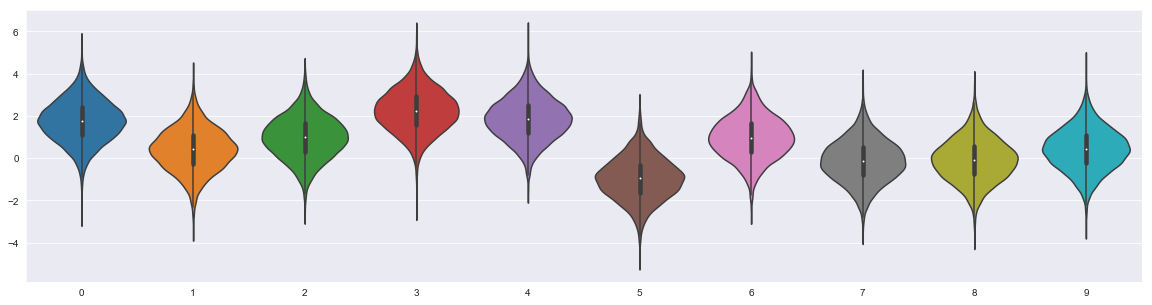

In [3]:
sample_size = 10000

plt.figure(figsize=(20, 5))
samples = np.zeros((n_k, sample_size))
for i in range(n_k):
    samples[i, :] = np.random.normal(qstars[0, i], 1, size=sample_size)
    
df = pd.DataFrame(samples.transpose())
sns.violinplot(data=df);

In [4]:
def simulate(qstars, bandit, timestep):
    
    n = len(qstars)
    
    avg_rewards = np.zeros(timestep)
    for i in range(n):
        avg_rewards += bandit.run(qstars[i, :], timestep)
    
    return avg_rewards / n


def plot(rewards, label):
    plt.plot(rewards, label=label+' total: '+str(rewards.sum())[:9])
    plt.xlabel('timestep')
    plt.ylabel('average reward')
    plt.legend()

## Explore then Commit

Explore-then-commit strategy is basically performing a/b test first, and then selecting the variant with the best performance

In [5]:
class ExploreThenCommitBandit():
    
    def __init__(self, n):
        self.wait = n
        
    def run(self, qstar, timestep):
        
        k = len(qstar)
        counter = np.zeros(k)
        rewards = np.zeros(timestep)
        
        for t in range(timestep):
            
            if t < k*self.wait: # exploration phase
                i = int(t / self.wait)
                c = t % self.wait
                r = np.random.normal(qstar[i])
                rewards[t] = r
                counter[i] = (counter[i]*(c) + r) / (c+1)
            else: # commitment phase
                a = np.argmax(counter)
                rewards[t] = np.random.normal(qstar[a])
                
        return rewards

In [7]:
plt.rcParams['figure.figsize'] = (20, 8)

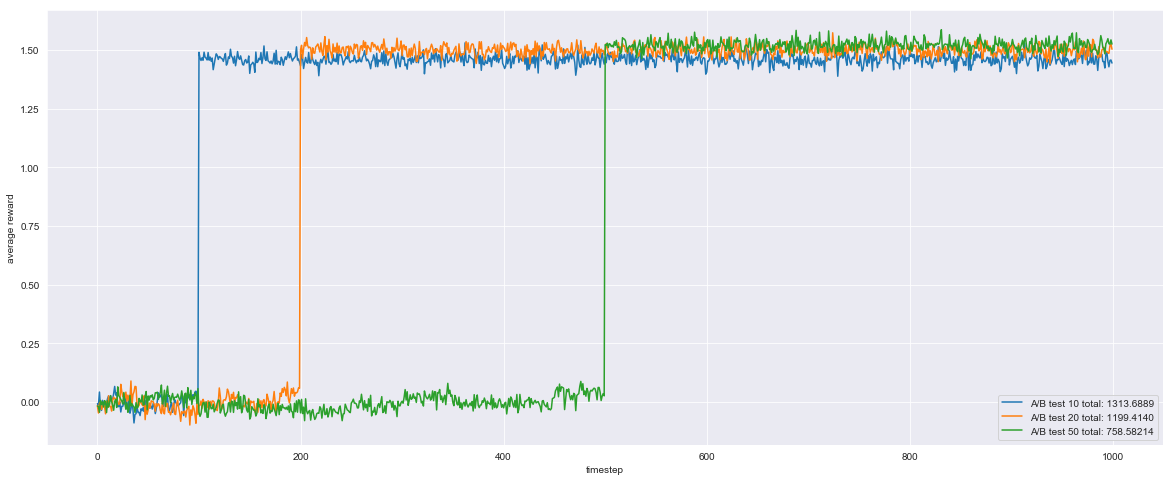

In [8]:
abandit = ExploreThenCommitBandit(10)
areward = simulate(qstars, abandit, 1000)
plot(areward, 'A/B test 10')

abandit = ExploreThenCommitBandit(20)
areward = simulate(qstars, abandit, 1000)
plot(areward, 'A/B test 20')

abandit = ExploreThenCommitBandit(50)
areward = simulate(qstars, abandit, 1000)
plot(areward, 'A/B test 50')